<a href="https://colab.research.google.com/github/Witney-C/qm2group18/blob/main/211212_Choropleth_Attempt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install newest branch
!pip install pysal

#Install the geopandas module
!pip install geopandas

     |████████████████████████████████| 2.4 MB 8.7 MB/s 
     |████████████████████████████████| 95 kB 5.2 MB/s 
     |████████████████████████████████| 60 kB 8.6 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 164 kB 58.0 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 41 kB 750 kB/s 
     |████████████████████████████████| 209 kB 33.4 MB/s 
     |████████████████████████████████| 5.7 MB 17.3 MB/s 
     |████████████████████████████████| 81 kB 10.8 MB/s 
     |████████████████████████████████| 138 kB 74.9 MB/s 
     |████████████████████████████████| 226 kB 81.4 MB/s 
     |████████████████████████████████| 269 kB 60.6 MB/s 
     |████████████████████████████████| 66.5 MB 110 kB/s 
     |████████████████████████████████| 1.0 MB 62.3 MB/s 
     |████████████████████████████████| 183 kB 65.0 MB/s 
     |████████████████████████████████| 117 kB 57.9 MB/s 
     |████████████████████

In [2]:
!mkdir data

In [3]:
!curl https://raw.githubusercontent.com/Witney-C/qm2group18/main/clinicsperwomen.csv -o ./data/access_data.csv
!curl https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json -o ./data/counties_geojson.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58813  100 58813    0     0   255k      0 --:--:-- --:--:-- --:--:--  254k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3141k  100 3141k    0     0  8583k      0 --:--:-- --:--:-- --:--:-- 8583k


In [4]:
!pip install descartes
!pip install mapclassify

In [5]:
from pysal import *
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes
import mapclassify

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [6]:
data_path = "/content/data/counties_geojson.json"

countygeo = gp.read_file(data_path)

countygeo

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


In [7]:
#find out crs of geometry
countygeo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
#project the lon/lat geometry
countygeo.crs = 'epsg:4326'
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_countygeo = countygeo.to_crs(crs=target_crs)

In [9]:
countygeo['geometry'].head()

0    POLYGON ((-86.49677 32.34444, -86.71790 32.402...
1    POLYGON ((-86.57780 33.76532, -86.75914 33.840...
2    POLYGON ((-85.18413 32.87053, -85.12342 32.772...
3    POLYGON ((-86.51734 33.02057, -86.51596 32.929...
4    POLYGON ((-88.13999 34.58170, -88.13925 34.587...
Name: geometry, dtype: geometry

In [10]:
projected_countygeo['geometry'].head()

0    POLYGON ((-9628776.837 3785750.549, -9653392.1...
1    POLYGON ((-9637796.499 3973585.638, -9657983.7...
2    POLYGON ((-9482654.087 3854941.816, -9475895.8...
3    POLYGON ((-9631066.679 3874750.966, -9630912.5...
4    POLYGON ((-9811698.583 4082928.727, -9811615.9...
Name: geometry, dtype: geometry

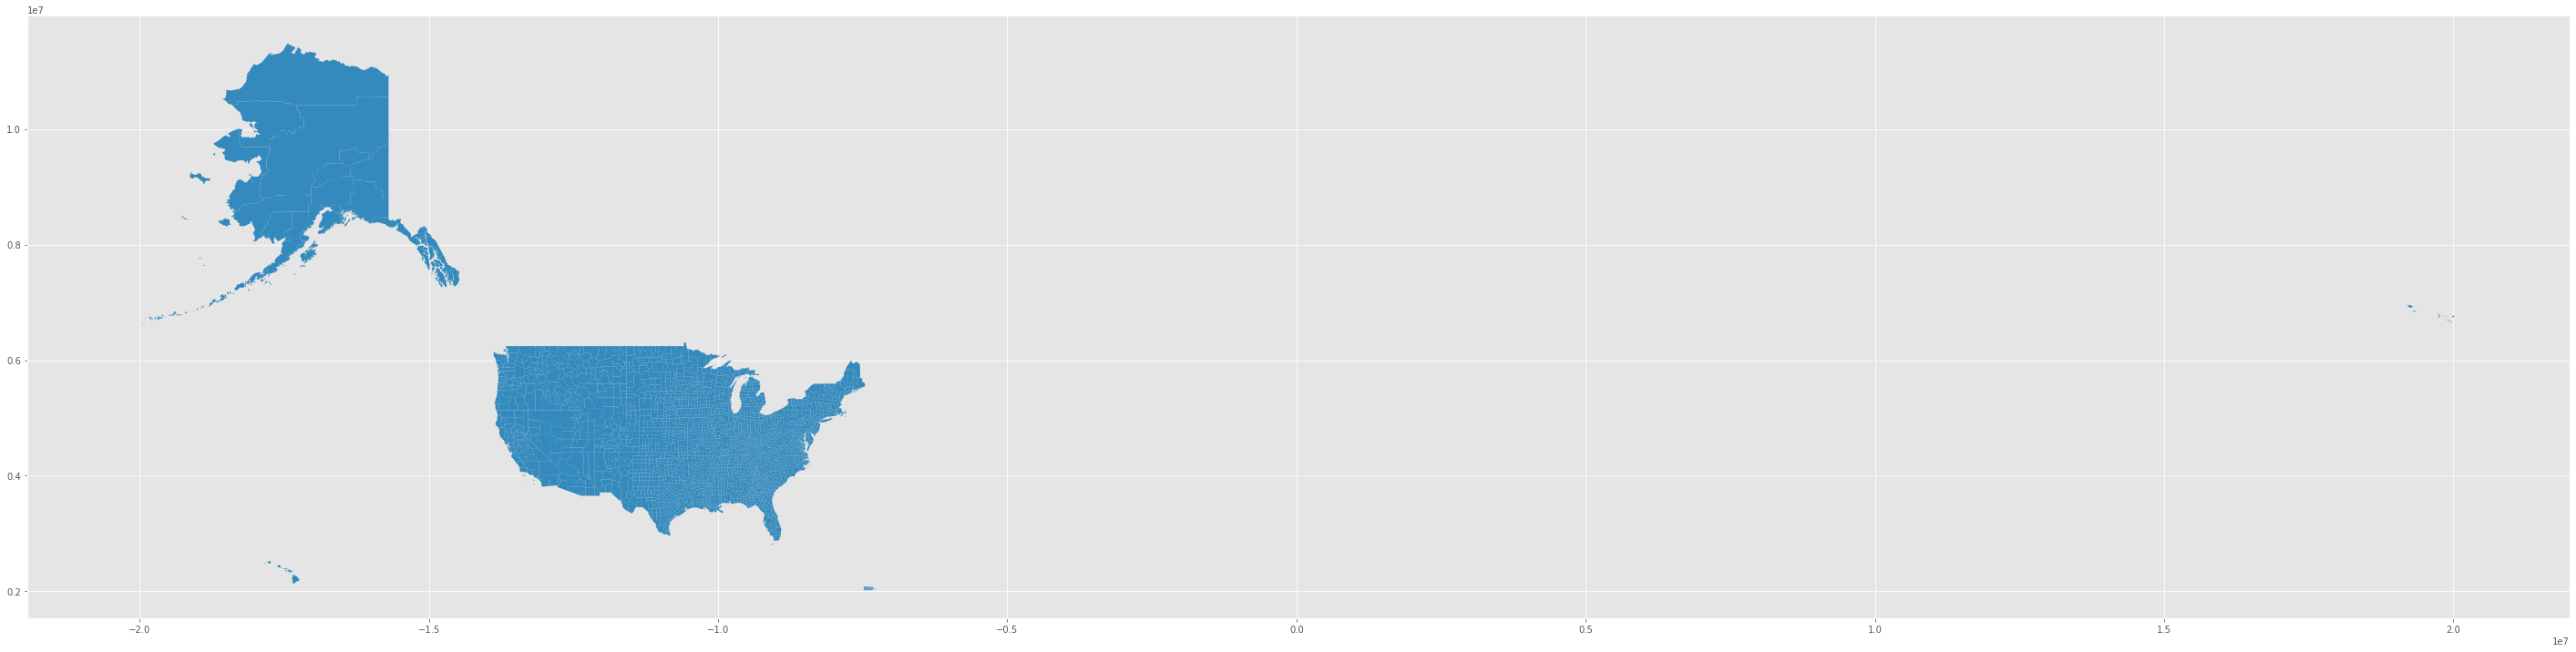

In [11]:
pylab.rcParams['figure.figsize'] = (50., 50.)
projected_countygeo.plot()

In [12]:
#try and zoom in on plot


In [13]:
#load in clinic data and clean it, make fips an int
data_path2 = "/content/data/access_data.csv"

access = pd.read_csv(data_path2, index_col='fips', na_values=['u','#VALUE!'])
access.drop('Unnamed: 0', axis=1, inplace=True)
access

,No. of clinics per 1000 women with demand
fips,
1001,0.2999
1003,0.2624
1005,1.2658
1007,2.1186
1009,0.3170
...,...
56037,0.3559
56039,NaN
56041,0.4098


In [14]:
access['No. of clinics per 1000 women with demand'].head()

fips
1001    0.2999
1003    0.2624
1005    1.2658
1007    2.1186
1009    0.3170
Name: No. of clinics per 1000 women with demand, dtype: float64

In [15]:
countygeo['id']=countygeo['id'].astype(int)
countygeo['id'].head()

0    1001
1    1009
2    1017
3    1021
4    1033
Name: id, dtype: int64

In [16]:
#create new geodataframe using fips codes/id as merger
geoaccess = countygeo.merge(access,left_on='id',right_on='fips')
geoaccess

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,No. of clinics per 1000 women with demand
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",0.2999
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",0.3170
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",0.2584
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",0.5929
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",0.3322
...,...,...,...,...,...,...,...,...,...
3134,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...",1.3289
3135,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243...",3.9216
3136,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512...",2.0833
3137,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891...",2.7523


In [17]:
#check 'geoaccess' is a geodataframe
type(geoaccess)

geopandas.geodataframe.GeoDataFrame

In [18]:
#save merged dataset as a new csv
data_path3 = "./data/county_accessgeo.csv"

geoaccess.to_csv(data_path3)

In [19]:
original_crs = geoaccess.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geoaccess = geoaccess.to_crs(crs=target_crs)

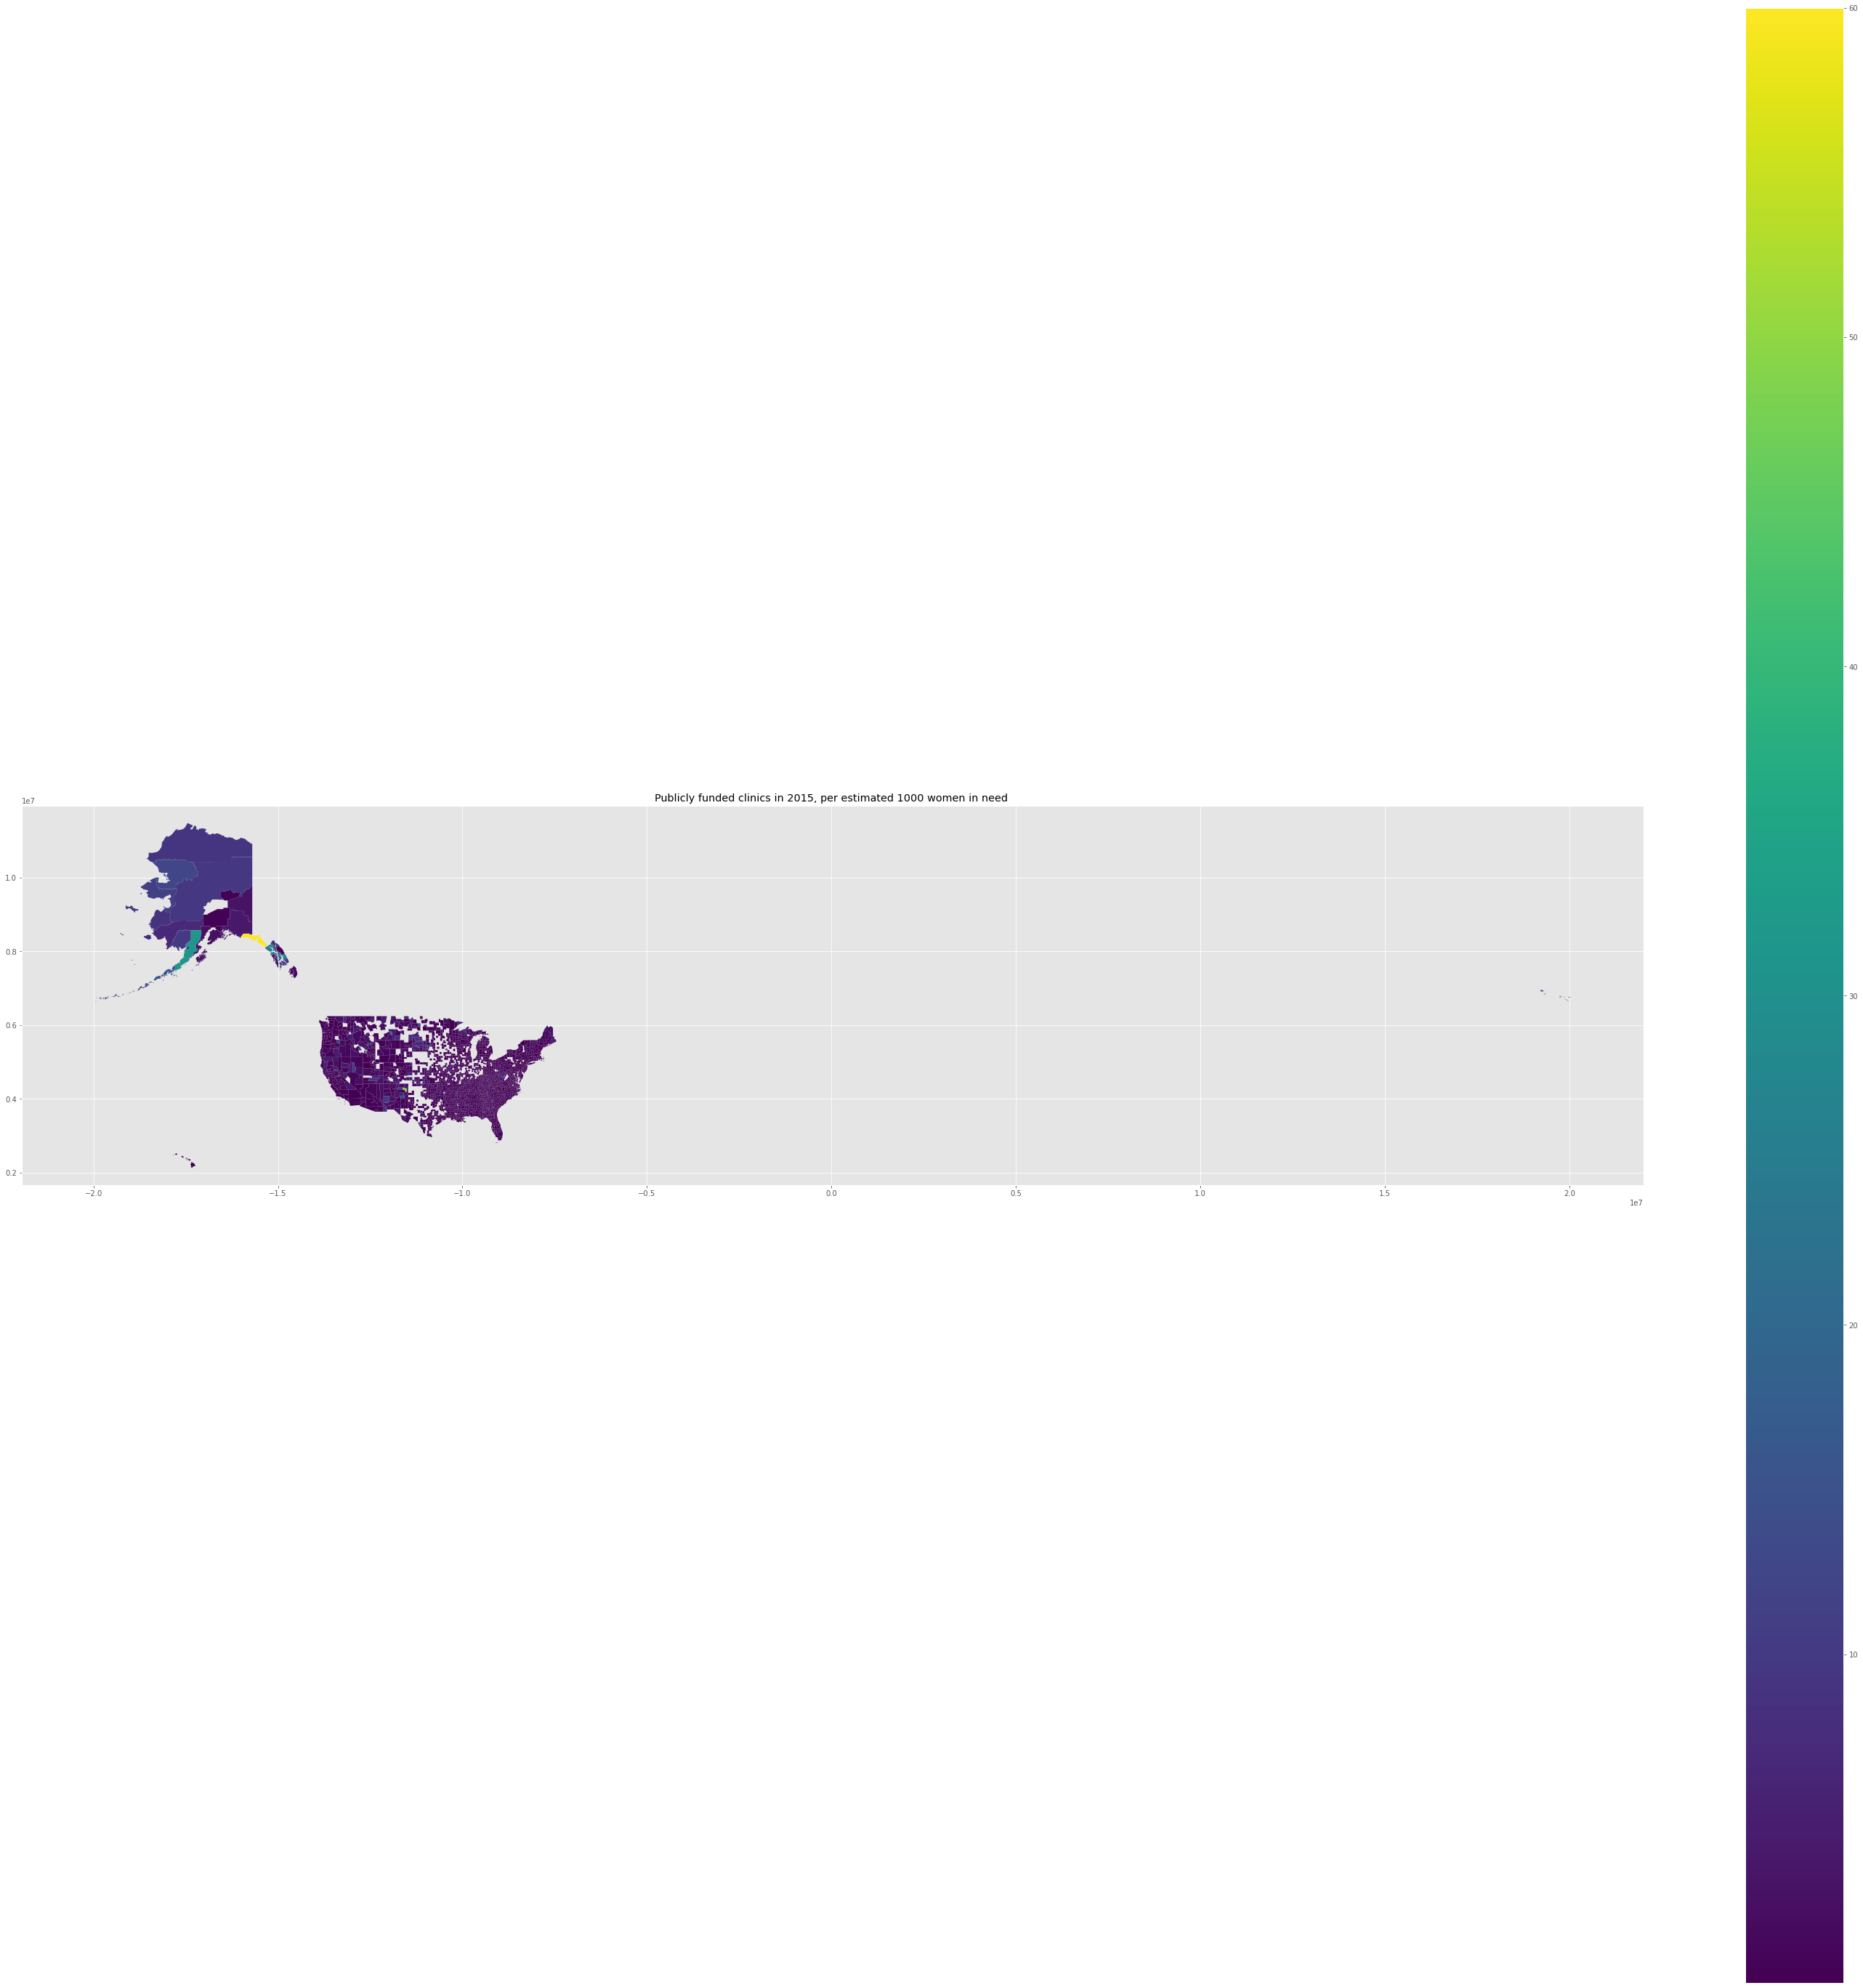

In [20]:
projected_geoaccess.plot(column='No. of clinics per 1000 women with demand',legend=True)
plt.title('Publicly funded clinics in 2015, per estimated 1000 women in need ')
plt.savefig('./data/Clinic_per_woman.png')

Code from week 9 workshop about quantiles/legend.

In [60]:
import numpy as np
import matplotlib

In [61]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in range(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [62]:
from pysal.viz.mapclassify import Quantiles

In [63]:
geoaccess = geoaccess[geoaccess["No. of clinics per 1000 women with demand"] != "NaN"]
geoaccess.dropna(axis=0, inplace=True)
geoaccess

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,No. of clinics per 1000 women with demand
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",0.2999
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",0.3170
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",0.2584
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",0.5929
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",0.3322
...,...,...,...,...,...,...,...,...,...
3134,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...",1.3289
3135,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243...",3.9216
3136,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512...",2.0833
3137,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891...",2.7523


In [64]:
#choose quantile number for binning
breaks = Quantiles(geoaccess['No. of clinics per 1000 women with demand'].values, k=5)
print(breaks)

Quantiles             

   Interval      Count
----------------------
[ 0.02,  0.21] |   513
( 0.21,  0.43] |   510
( 0.43,  0.80] |   511
( 0.80,  1.64] |   514
( 1.64, 60.00] |   509


In [65]:
print(breaks.bins)

[ 0.207    0.42514  0.80096  1.6393  60.     ]


In [83]:
bar_labels = ['<=%i'% b for b in breaks.bins]

print(bar_labels)

['<=0', '<=0', '<=0', '<=1', '<=60']


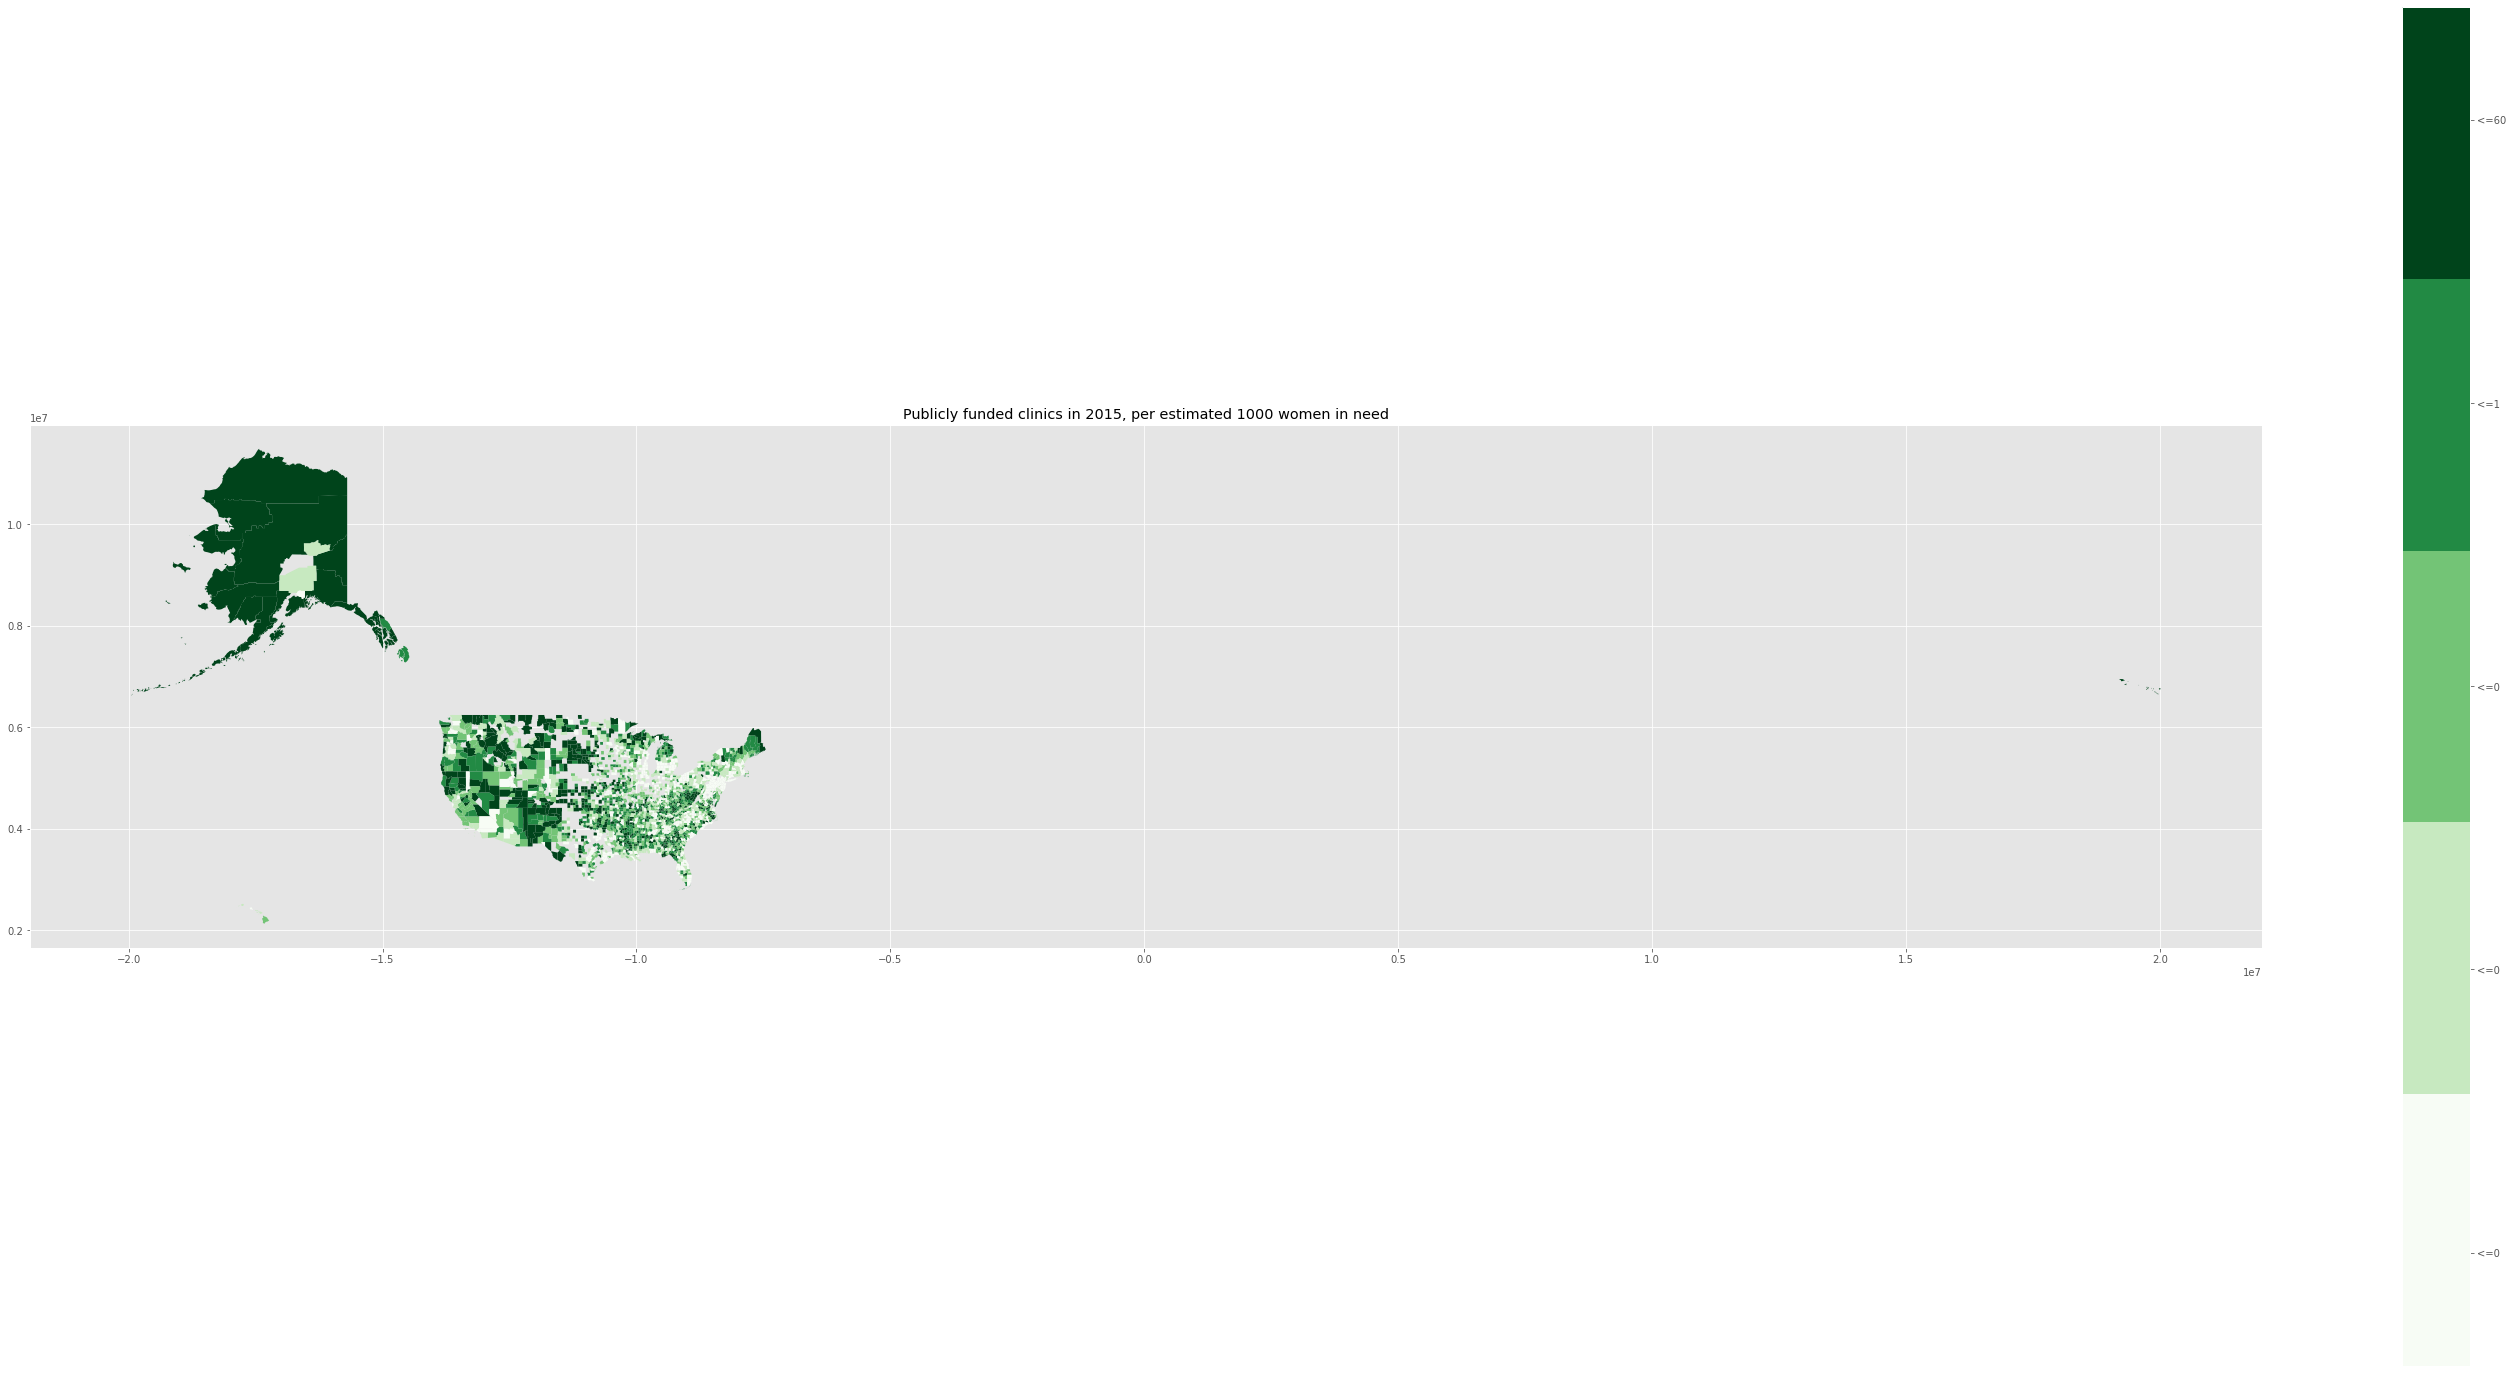

In [84]:
projected_geoaccess.plot(column='No. of clinics per 1000 women with demand', cmap='Greens', scheme='quantiles', k=5)
plt.title('Publicly funded clinics in 2015, per estimated 1000 women in need')

cmap = plt.get_cmap('Greens')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)